In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/gulim.ttc' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

In [3]:
input_file_name = 'C:/Users/Playdata/pytest/contest/main_df.csv'
df = pd.read_csv(input_file_name, encoding= 'utf8')

In [4]:
df.head()

,file_name,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Year,Month,Day,Time,length_of_text,main_language,Group,ip
0,059faa80-e6d3-47ff-8a45-edf0fba4e398.eml,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2019.0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154
1,059fd5ff-a546-4924-a6e9-a14f3bba805d.eml,suminy@outlook.kr,from [167.139.250.4] by 73.132.221.32 with ESM...,"Mon, 20 Apr 2020 22:38:31 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Apr,Mon,22.0,509.0,ko,A,167.139.250.4
2,059fd98b-68f8-4722-8870-9671abfda544.eml,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3
3,059ffd38-f893-46ff-b65d-2f70da33dd90.eml,yenjuy@outlook.kr,from [208.206.157.152] by 73.132.221.32 with E...,"Sun, 05 Apr 2020 22:39:19 +0300",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Apr,Sun,22.0,217.0,ko,A,208.206.157.152
4,059ffe9c-b1a7-4b57-8174-8b0afe03366e.eml,noah@ajne.com,from localhost ([127.0.0.1]) by localhost via ...,"Tue, 21 Apr 2020 17:52:56 +0800",This message contained an attachment that was ...,0,0,2020.0,Apr,Tue,17.0,210.0,en,D,127.0.0.1


In [4]:
group = ['A', 'B' , 'C', 'D']

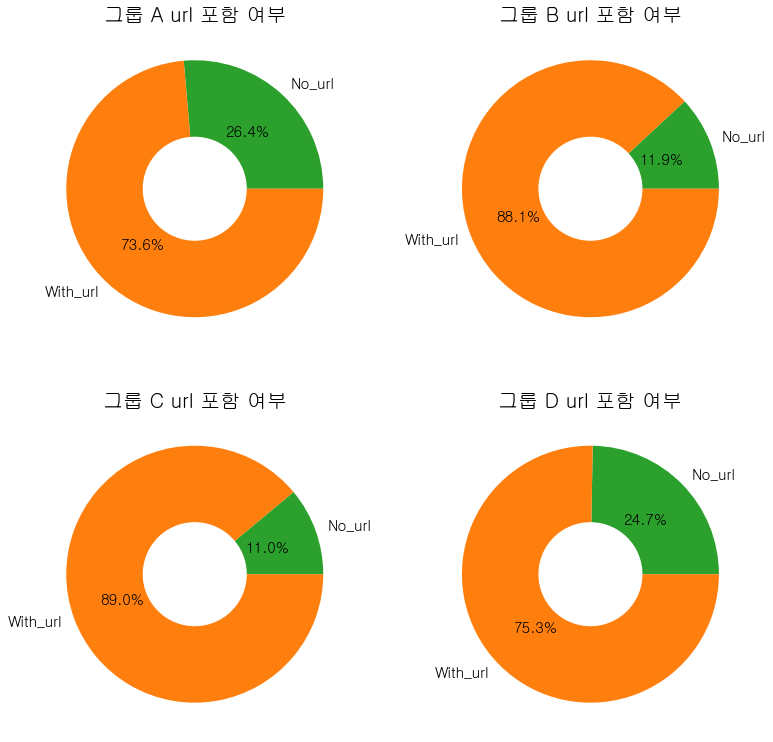

In [6]:
# 그룹별 url 여부

f, ax = plt.subplots(2, 2, figsize=(13,13))
matplotlib.rc('font', size=15)

for i in range(2):
    for j in range(2):
    
        data = df[df['Group']==group[2*i+j]]
        url_counter = Counter(data['include_url'])
        ax[i][j].pie( [url_counter[i] for i in sorted(url_counter.keys())], autopct='%1.1f%%', colors = ['tab:green', 'tab:orange'], 
                     labels=['No_url' if i ==0 else 'With_url' for i in sorted(url_counter.keys()) ])
        
        centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
        ax[i,j].add_patch( centre_circle )

        ax[i,j].set_title('그룹 ' +group[2*i+j]+ ' url 포함 여부', fontsize=20)

plt.savefig('group_graph/group_url.png', dpi=300)

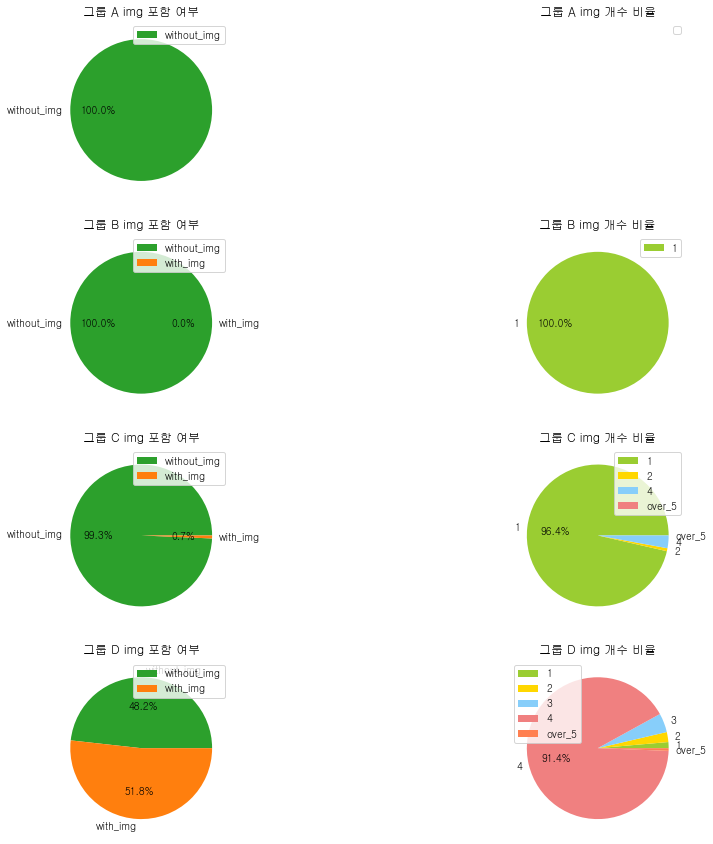

In [7]:
# 그룹별 img 포함 비율과 포함 시 img 개수별 비율 
color1 = ['tab:green', 'tab:orange']
color2 = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'coral', 'orchid']
f, ax = plt.subplots(4, 2, figsize=(15,15))
matplotlib.rc('font', size=10)

for t in range(4):
    data = df[df['Group']==group[t]]

    img_counter = Counter(data['num_of_imgs'])
    img_counter2 = {}
    for i in sorted(img_counter.keys()):
        if i ==0 :
            img_counter2['without_img'] = img_counter[i]
        else:
            try:
                img_counter2['with_img'] += img_counter[i] 
            except:
                img_counter2['with_img'] = 0
    img_counter3 = {}
    for i in sorted(img_counter.keys()):
        if i >0 and i <5 :
            img_counter3[i] = img_counter[i]
        elif i >=5:
            try:
                img_counter3['over_5'] += img_counter[i]
            except:
                img_counter3['over_5'] = 0
    ax[t,0].pie(img_counter2.values(), autopct= '%1.1f%%', colors = color1, labels=img_counter2.keys())
    ax[t,0].legend(img_counter2.keys())
    ax[t,0].set_title('그룹 '+ group[t] +' img 포함 여부')

    ax[t,1].pie(img_counter3.values(), autopct=lambda p :(f'{p:1.1f}%') if p>50 else '', colors = color2, labels=img_counter3.keys())
    ax[t,1].legend(img_counter3.keys())
    ax[t,1].set_title('그룹 '+group[t]+' img 개수 비율')

plt.savefig('group_graph/group_img.png', dpi=300)

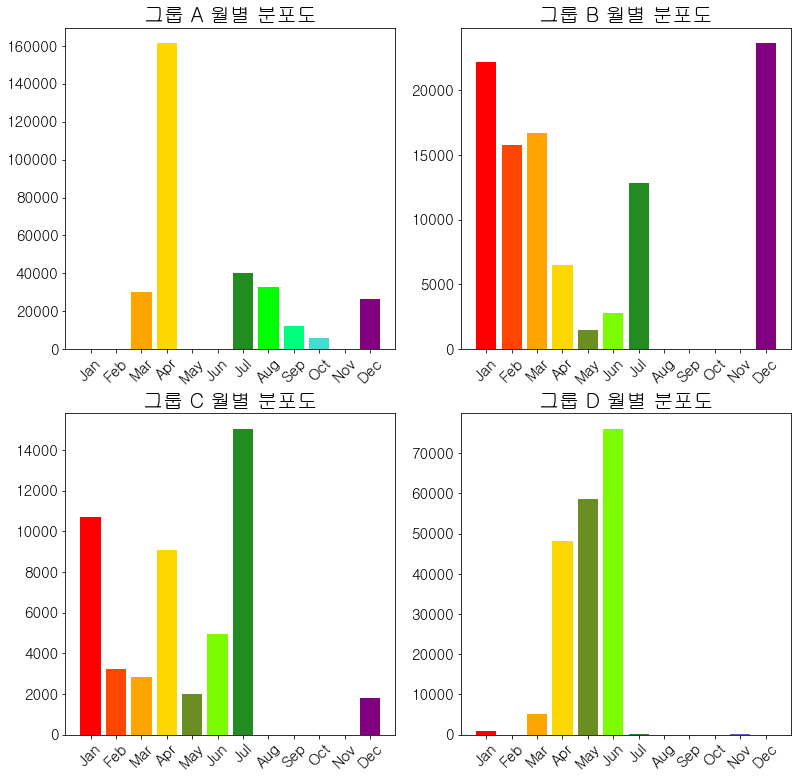

In [67]:
# 그룹 월별 분포

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', "Dec"]
color= ['red', 'orangered', 'orange', 'gold', 'olivedrab', 'lawngreen', 'forestgreen', 'lime', 'springgreen', 
           'turquoise', 'slateblue', 'purple']

f, ax = plt.subplots(2, 2, figsize=(13,13))
matplotlib.rc('font', size=15)

for i in range(2):
    for j in range(2):
        data = df[df['Group']==group[2*i+j]]
        month_counter = Counter(data['Month'])
        ax[i,j].bar(Months, [month_counter[i] for i in Months ] , color= color)
        ax[i,j].tick_params('x',labelsize='small',labelrotation=45)
        ax[i,j].set_title('그룹 ' +group[2*i+j]+ ' 월별 분포도', fontsize=20)

plt.savefig('group_graph/group_month.png', dpi=300)

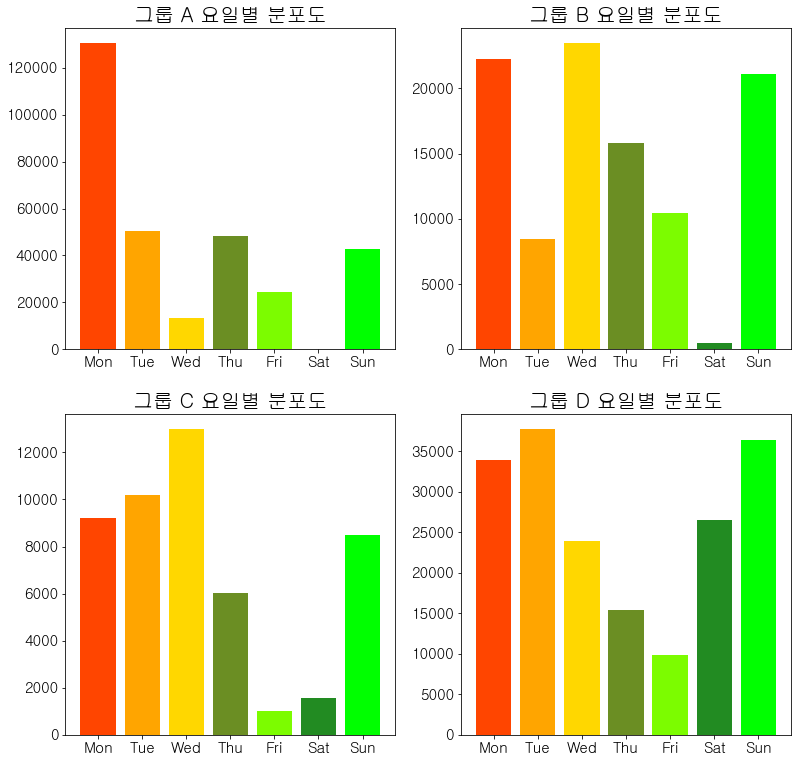

In [74]:
# 그룹 요일별 분포

Days = ['Mon', 'Tue' , 'Wed' , 'Thu', 'Fri', 'Sat', 'Sun']

f, ax = plt.subplots(2, 2, figsize=(13,13))
matplotlib.rc('font', size=15)

for i in range(2):
    for j in range(2):
        data = df[df['Group']==group[2*i+j]]
        day_counter = Counter(data['Day'])
        ax[i,j].bar(Days, [day_counter[i] for i in Days ] , color= color[1:])
        ax[i,j].set_title('그룹 ' +group[2*i+j]+ ' 요일별 분포도', fontsize=20)

plt.savefig('group_graph/group_day.png', dpi=300)

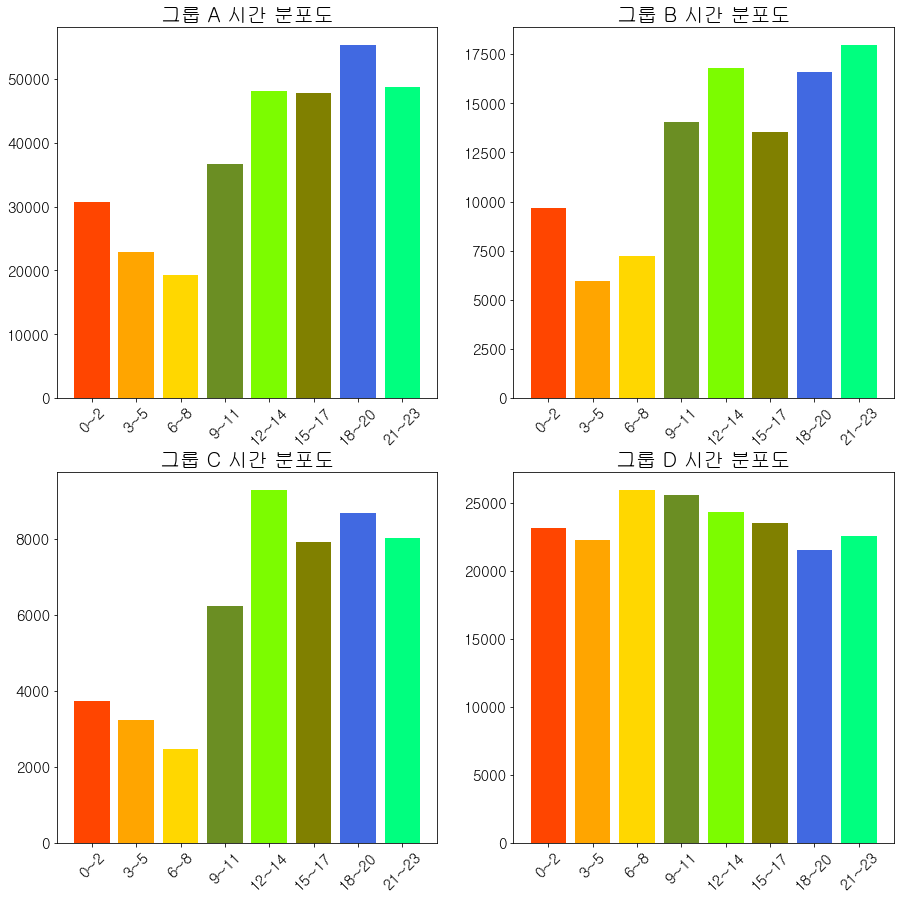

In [81]:
# 그룹 시간별 분포

Time_range = ['0~2','3~5','6~8', '9~11', '12~14','15~17' , '18~20' , '21~23' ]
color= ['orangered', 'orange', 'gold', 'olivedrab', 'lawngreen', 'olive', 'royalblue', 'springgreen']

f, ax = plt.subplots(2, 2, figsize=(15,15))

for i in range(2):
    for j in range(2):
        data = df[df['Group']==group[2*i+j]]
        time_counter = Counter(data['Time'].dropna())
        time_counter1 = {}
        for t in sorted(time_counter.keys()):
            if int(i) < 24:
                time_counter1[int(t)] = time_counter[t]
            else:
                time_counter1[int(t)-24] += time_counter[t]
        ax[i,j].bar(Time_range, [time_counter1[t] + time_counter1[t+1] + time_counter1[t+2] for t in range(0,24,3) ] , color= color)
        ax[i,j].tick_params('x',labelrotation=45)
        ax[i,j].set_title('그룹 ' +group[2*i+j]+ ' 시간 분포도', fontsize=20)

plt.savefig('group_graph/group_time.png', dpi=300)

In [ ]:
# 그룹별 언어 비율

f, ax = plt.subplots(2, 2, figsize=(13,13))
matplotlib.rc('font', size=15)
languages = ['ko', 'en', 'de', 'ja']
color = ['gold' , 'indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']

for i in range(2):
    for j in range(2):
    
        data = df[df['Group']==group[2*i+j]]
        lan_counter = Counter(data['main_language'].dropna())

        lan_counter1 = {}
        for t in lan_counter.keys():
            if t in languages:
                lan_counter1[t] = lan_counter[t]
            else:
                try:
                    lan_counter1['others'] += lan_counter[t]
                except:
                    lan_counter1['others'] = lan_counter[t]
        
        ax[i][j].pie(lan_counter1.values(), autopct='%1.1f%%', colors = color, labels=lan_counter1.keys())
        
        centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
        ax[i,j].add_patch( centre_circle )

        ax[i,j].set_title('그룹 ' +group[2*i+j]+ ' 언어 비율', fontsize=20)

plt.savefig('group_graph/group_language.png', dpi=300)

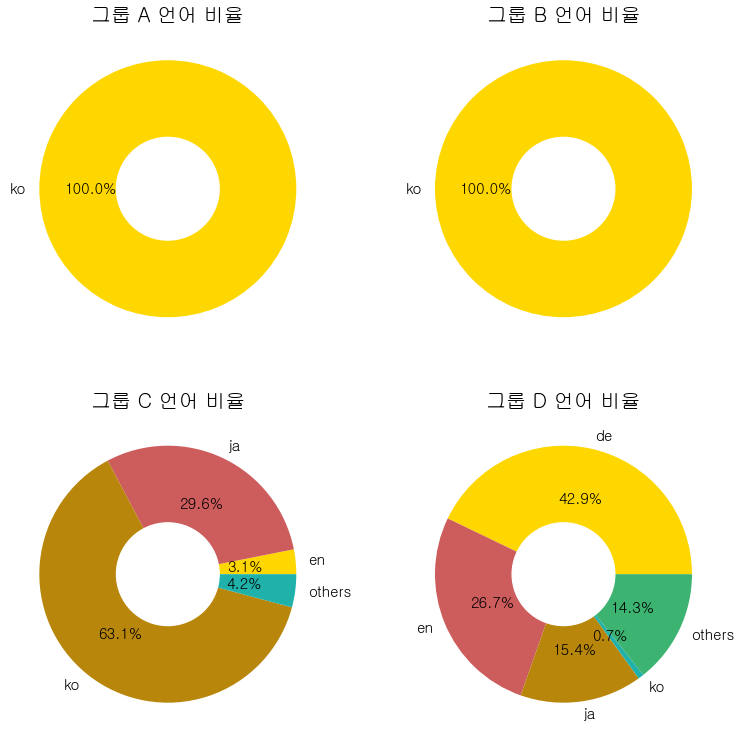

In [9]:
# 그룹별 언어 비율

f, ax = plt.subplots(2, 2, figsize=(13,13))
matplotlib.rc('font', size=15)
languages = ['ko', 'en', 'de', 'ja']
color = ['gold' , 'indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']

for i in range(2):
    for j in range(2):
    
        data = df[df['Group']==group[2*i+j]]
        lan_counter = Counter(data['main_language'].dropna())

        lan_counter1 = {}
        for t in lan_counter.keys():
            if t in languages:
                lan_counter1[t] = lan_counter[t]
            else:
                try:
                    lan_counter1['others'] += lan_counter[t]
                except:
                    lan_counter1['others'] = lan_counter[t]
        
        ax[i][j].pie( [lan_counter1[i] for i in sorted(lan_counter1.keys())], autopct='%1.1f%%', colors = color, labels=sorted(lan_counter1.keys()))
        
        centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
        ax[i,j].add_patch( centre_circle )

        ax[i,j].set_title('그룹 ' +group[2*i+j]+ ' 언어 비율', fontsize=20)

plt.savefig('group_graph/group_language.png', dpi=300)

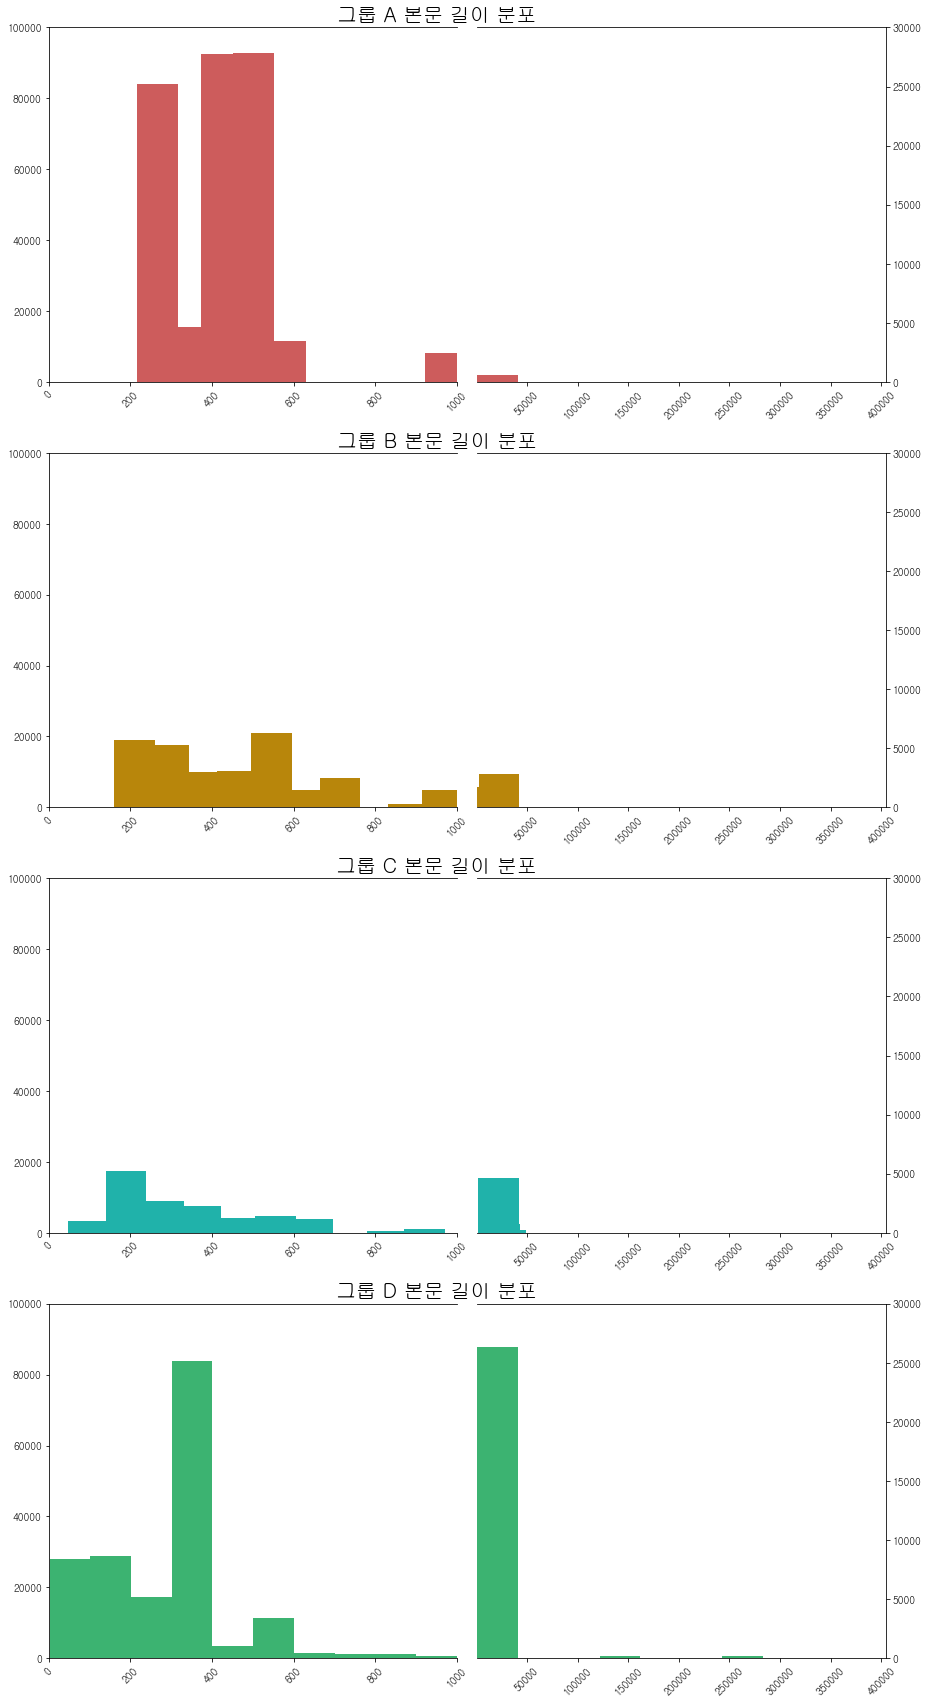

In [54]:
# 그룹별text 길이

f, ax = plt.subplots(4, 2, figsize=(15,30))
color = ['indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']
for i in range(4):
    data = df[df['Group']==group[i]]

    ax[i,0].hist(data[data['length_of_text']<1000]['length_of_text'].dropna() , width = 100, color= color[i])
    ax[i,1].hist(data[data['length_of_text']>1000]['length_of_text'].dropna() , width = 40000, color= color[i])

    ax[i,0].set_xlim(0, 1000)  
    ax[i,1].set_xlim(1000, max(df['length_of_text']))  

    ax[i,0].set_ylim(0, 100000)  
    ax[i,1].set_ylim(0, 30000) 
    

    ax[i,0].spines['right'].set_visible(False)
    ax[i,1].spines['left'].set_visible(False)

    ax[i,1].yaxis.tick_right()
    
    ax[i,0].tick_params('x',labelrotation=45)
    ax[i,1].tick_params('x',labelrotation=45)
    
    ax[i,1].set_title('그룹 '+group[i]+' 본문 길이 분포',  position= (-0.1,1), size=20)

        
plt.subplots_adjust(wspace=0.05)

plt.savefig('group_graph/group_text_length.png', dpi=300)

In [8]:
lgroups = ['ko', 'en', 'de', 'ja']
country = ['한국어', '영어', '독일어', '일본어']

Counter({1: 354180, 0: 96910})
Counter({0: 67513, 1: 19219})
Counter({1: 87334, 0: 112})
Counter({1: 48538, 0: 785})


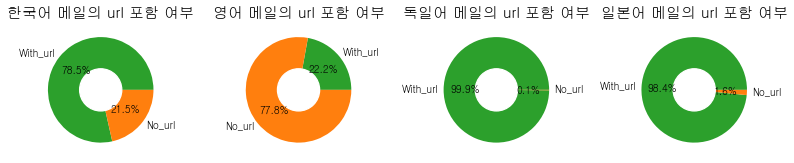

In [9]:
# 언어 그룹별 url 여부

f, ax = plt.subplots(1, 4, figsize=(13,13))
matplotlib.rc('font', size=10)

for i in range(4):
    
    data = df[df['main_language']==lgroups[i] ]
    url_counter = Counter(data['include_url'])
    print(url_counter)
    ax[i].pie( [url_counter[i] for i in [1,0]], autopct='%1.1f%%', colors = ['tab:green', 'tab:orange'], labels=['With_url' , 'No_url']     )

    centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
    ax[i].add_patch( centre_circle )

    ax[i].set_title( country[i]+ ' 메일의 url 포함 여부', fontsize=15)
plt.subplots_adjust(wspace=0.5)
plt.savefig('group_graph/lan_group_url.png', dpi=300)

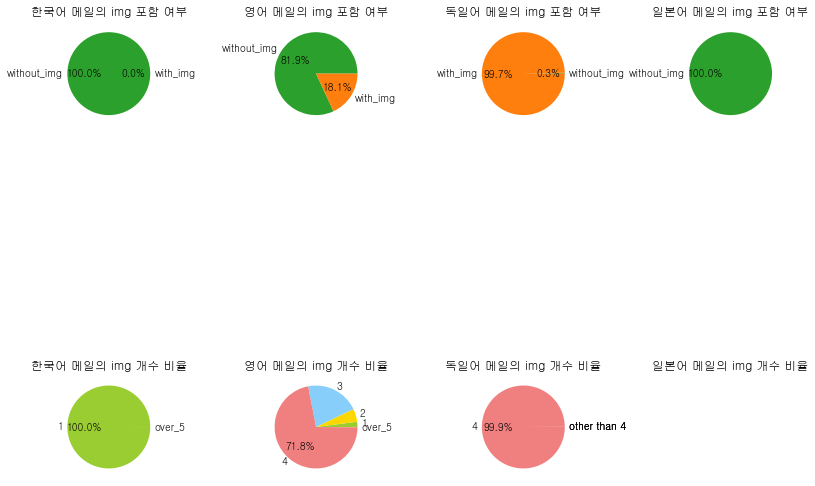

In [30]:
#  언어 그룹별 이미지 포함 여부와 이미지 개수 비율
color1 = ['tab:green', 'tab:orange']
color2 = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'coral', 'orchid']

f, ax = plt.subplots(2, 4, figsize=(13,13))
matplotlib.rc('font', size=10)

for t in range(4):
    
    data = df[df['main_language']==lgroups[t] ]
    img_counter = Counter(data['num_of_imgs'])
    
    img_counter2 = {}
    for i in sorted(img_counter.keys()):
        if i ==0 :
            img_counter2['without_img'] = img_counter[i]
        else:
            try:
                img_counter2['with_img'] += img_counter[i] 
            except:
                img_counter2['with_img'] = 0
    img_counter3 = {}
    for i in sorted(img_counter.keys()):
        if i >0 and i <5 :
            img_counter3[i] = img_counter[i]
        elif i >=5:
            try:
                img_counter3['over_5'] += img_counter[i]
            except:
                img_counter3['over_5'] = 0
    
    
    ax[0,t].pie(img_counter2.values(), autopct= '%1.1f%%', colors = color1, labels=img_counter2.keys())
    ax[0,t].set_title( country[t] +' 메일의 img 포함 여부')
    
    if t != 2:
        ax[1,t].pie(img_counter3.values(), autopct=lambda p :(f'{p:1.1f}%') if p>50 else '', colors = color2, labels=img_counter3.keys() )
    else:
        ax[1,t].pie(img_counter3.values(), autopct=lambda p :(f'{p:1.1f}%') if p>50 else '', colors = color2,
                    labels= ['other than 4'if i !=4 else '4' for i in img_counter3.keys()] )
    ax[1,t].set_title( country[t]+' 메일의 img 개수 비율')
plt.subplots_adjust(hspace= 0)
plt.subplots_adjust(wspace=1)
plt.savefig('group_graph/lan_group_img.png', dpi=300)

In [13]:
ip1 = [i[0] for i in Counter(df['ip']).items() if i[1] ==1 ]

In [17]:
boolean_series = df.ip.isin(ip1)
filtered_df = df[boolean_series]

filtered_df

,file_name,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Year,Month,Day,Time,length_of_text,main_language,Group,ip
0,059faa80-e6d3-47ff-8a45-edf0fba4e398.eml,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2019.0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154
2,059fd98b-68f8-4722-8870-9671abfda544.eml,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3
5,05a009bf-ac20-45c6-9656-0eb8a3025719.eml,hjndghdsghsdgh@gmail.com,from [209.41.49.28] by 73.132.221.32 with ESMT...,"Fri, 19 Jul 2019 06:42:18 +0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,1,2019.0,Jul,Fri,6.0,73.0,ko,C,209.41.49.28
11,05a0b441-e97b-41ea-a50b-75296b898244.eml,jinchulkee@yahoo.co.kr,from [100.42.21.145] by 73.132.221.32 with ESM...,"Thu, 11 Jul 2019 03:10:21 -0100",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,2019.0,Jul,Thu,3.0,256.0,ko,B,100.42.21.145
18,05a104df-7d58-4fd1-ba09-275bff9efafd.eml,juil@nate.com,from [241.136.128.48]\n\tby 73.132.221.32 with...,"Wed, 05 Feb 2020 19:02:15 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Feb,Wed,19.0,503.0,ko,B,241.136.128.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710423,fffd45ed-86d6-4688-93ad-77f6ef1b32cf.eml,juil@nate.com,from [30.223.17.137] by 73.132.221.32 with SMT...,"Wed, 05 Feb 2020 10:52:13 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2020.0,Feb,Wed,10.0,503.0,ko,B,30.223.17.137
710427,fffdbfc8-53ce-4527-a8b0-c67dd082d5ab.eml,xue64w0370t9p@oa4egz6a98x1.com,"from 139.5.88.52(139.5.88.52)\n\tat Sun, 24 Ma...","Sun, 24 May 2020 13:11:33 +0900",2020/05/24 13:11E10003119273\n@QXglﾖ @`\n\nﾅとの...,1,0,2020.0,May,Sun,13.0,339.0,ja,D,139.5.88.52
710428,fffdc4bf-9455-43cd-87cd-70e6450bdb57.eml,hajkd1323@naver.com,from [143.74.83.114] by 73.132.221.32 id 8lKHw...,"Tue, 21 Jan 2020 08:47:47 +0200",Content-Type: text/plain;\nContent-Transfer-En...,1,0,2020.0,Jan,Tue,8.0,552.0,ko,D,143.74.83.114
710436,ffffbb6b-ddaf-4f7b-8133-d5a3da1ce200.eml,juyoung@gmail.com,from [152.248.157.220] by 73.132.221.32 with E...,"Tue, 17 Dec 2019 01:13:04 +0400",Content-Type: text/html;\nContent-Transfer-Enc...,1,0,2019.0,Dec,Tue,1.0,586.0,ko,A,152.248.157.220


In [20]:
len([ i[0] for i in Counter(filtered_df['MAIL_FROM']).items() if i[1]==1  ])

22365

In [21]:
from_1 = len([ i[0] for i in Counter(filtered_df['MAIL_FROM']).items() if i[1]==1  ])
from_many = len(df)- from_1

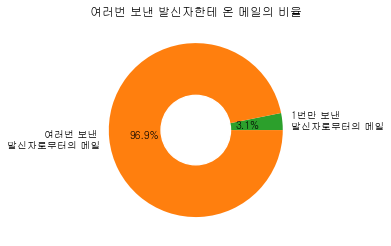

In [27]:
plt.pie( [from_1, from_many], autopct='%1.1f%%', colors = ['tab:green', 'tab:orange'], labels= ['1번만 보낸 \n발신자로부터의 메일', '여러번 보낸 \n발신자로부터의 메일'] )

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('여러번 보낸 발신자한테 온 메일의 비율')
plt.savefig('total_data_graph/many_or_1time.png', dpi=300)